# Importing libraries

## Basics

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot

## Exploratory data analysis

In [2]:
from pandas.plotting import scatter_matrix
from sklearn.model_selection import ShuffleSplit

## Cross validation

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate

## Models

In [4]:
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier, RadiusNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

## Metrics

In [5]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score as auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score

# Exploratory data analysis

Loading the data:

In [6]:
#gtd_ori = pd.read_excel("globalterrorismdb_0617dist.xlsx")

Taking a random sample of the data.

In [7]:
#smp = gtd_ori.sample(frac=0.25, random_state=4721)
#smp.to_excel("sample.xlsx")
gtd = pd.read_excel("sample.xlsx")

In [8]:
gtd.info(verbose=True, null_counts=True, max_cols=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42588 entries, 145918 to 94344
Data columns (total 135 columns):
eventid               42588 non-null int64
iyear                 42588 non-null int64
imonth                42588 non-null int64
iday                  42588 non-null int64
approxdate            1876 non-null object
extended              42588 non-null int64
resolution            560 non-null datetime64[ns]
country               42588 non-null int64
country_txt           42588 non-null object
region                42588 non-null int64
region_txt            42588 non-null object
provstate             38954 non-null object
city                  42485 non-null object
latitude              41454 non-null float64
longitude             41454 non-null float64
specificity           42587 non-null float64
vicinity              42588 non-null int64
location              11964 non-null object
summary               26054 non-null object
crit1                 42588 non-null int64
crit2 

### Column data types and the number of unique values in them.

In [9]:
uniques = gtd.nunique()
types = gtd.dtypes

In [10]:
atts = pd.concat([uniques, types], axis=1)
#atts.rename(columns=['types', 'uniques'], inplace=True)
atts.columns = ['uniques', 'types']

for coltype in atts.types.unique():
    clist = atts[atts.types == coltype].sort_values(by='uniques', ascending=False)
    print("\n{}:\n\n{}\n".format(coltype, clist.uniques))


int64:

eventid        42588
country          183
iyear             46
iday              32
targtype1         22
imonth            13
region            12
weaptype1         12
attacktype1        9
INT_MISC           3
INT_IDEO           3
INT_LOG            3
property           3
INT_ANY            3
doubtterr          3
vicinity           3
suicide            2
success            2
individual         2
crit3              2
crit2              2
crit1              2
extended           2
multiple           2
Name: uniques, dtype: int64


object:

summary               25703
target1               23296
scite1                22616
scite2                15947
city                  13031
location              10912
corp1                  9994
scite3                 9069
weapdetail             5795
propcomment            5587
related                5386
addnotes               4251
motive                 3874
gname                  1710
provstate              1625
target2                1364


## Attribute domain categories

Based on the GTD Codebook (adjusted with own analysis), the dataset consists of the following attribute groups:
1. Time
2. Location
3. Incident
4. Attack
5. Perpetrators
6. Perpetrator validity
7. Weapon
8. Target
9. Casualties and consequences
10. Additional information

In [11]:
att_time = ['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended', 'resolution']
att_loc = ['country', 'country_txt', 'region', 'region_txt', 'provstate', 'city', 'latitude', 'longitude', 'specificity','vicinity', 'location']
att_incid = ['summary', 'crit1', 'crit2', 'crit3', 'doubtterr', 'alternative', 'alternative_txt', 'multiple', 'related']
att_attack = ['success', 'suicide', 'attacktype1', 'attacktype1_txt', 'attacktype2', 'attacktype2_txt', 'attacktype3', 'attacktype3_txt']
att_perp = ['gname', 'gsubname', 'gname2', 'gsubname2', 'gname3', 'gsubname3']
att_perval = ['motive', 'guncertain1', 'guncertain2', 'guncertain3', 'individual', 'nperps', 'nperpcap', 'claimed', 'claimmode', 'claimmode_txt', 'claim2', 'claimmode2', 'claimmode2_txt', 'claim3', 'claimmode3', 'claimmode3_txt', 'compclaim']
att_weap = ['weaptype1', 'weaptype1_txt', 'weapsubtype1', 'weapsubtype1_txt', 'weaptype2', 'weaptype2_txt', 'weapsubtype2', 'weapsubtype2_txt', 'weaptype3', 'weaptype3_txt', 'weapsubtype3', 'weapsubtype3_txt', 'weaptype4', 'weaptype4_txt', 'weapsubtype4', 'weapsubtype4_txt', 'weapdetail']
att_targ = ['targtype1', 'targtype1_txt', 'targsubtype1', 'targsubtype1_txt', 'corp1', 'target1', 'natlty1', 'natlty1_txt', 'targtype2', 'targtype2_txt', 'targsubtype2', 'targsubtype2_txt', 'corp2', 'target2', 'natlty2', 'natlty2_txt', 'targtype3', 'targtype3_txt', 'targsubtype3', 'targsubtype3_txt', 'corp3', 'target3', 'natlty3', 'natlty3_txt']
att_cons = ['nkill', 'nkillus', 'nkillter', 'nwound', 'nwoundus', 'nwoundte', 'property', 'propextent', 'propextent_txt', 'propvalue', 'propcomment', 'ishostkid', 'nhostkid', 'nhostkidus', 'nhours', 'ndays', 'divert', 'kidhijcountry', 'ransom', 'ransomamt', 'ransomamtus', 'ransompaid', 'ransompaidus', 'ransomnote', 'hostkidoutcome', 'hostkidoutcome_txt', 'nreleased']
att_info = ['addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG', 'INT_IDEO', 'INT_MISC', 'INT_ANY',]

### From among these the 'att_perp' group contains the target variable(s).

## Perpetrator names

In [12]:
gtd[att_perp].sample(10)

,gname,gsubname,gname2,gsubname2,gname3,gsubname3
59099,Muslims,NaN,NaN,NaN,NaN,NaN
35251,Unknown,NaN,NaN,NaN,NaN,NaN
122090,Unknown,NaN,NaN,NaN,NaN,NaN
87606,Ahrar Al-Jalil (Free People of the Galilee),Ahrar Al Jalil Brigades,Al-Aqsa Martyrs Brigade,NaN,Popular Front for the Liberation of Palestine ...,NaN
112270,Unknown,NaN,NaN,NaN,NaN,NaN
137738,Al-Shabaab,NaN,NaN,NaN,NaN,NaN
157103,Unknown,NaN,NaN,NaN,NaN,NaN
57838,Bihar People's Party (Hindu militants),NaN,NaN,NaN,NaN,NaN
64053,"National United Front for an Independent, Neut...",NaN,NaN,NaN,NaN,NaN
9300,Unknown,NaN,NaN,NaN,NaN,NaN


In [13]:
gtd[att_perp].describe()

,gname,gsubname,gname2,gsubname2,gname3,gsubname3
count,42588,1284,450,38,62,2
unique,1710,461,185,28,40,2
top,Unknown,Militants,Al-Nusrah Front,The Family,Islamic State of Iraq and the Levant (ISIL),Shehryar Mehsud Group
freq,19632,115,12,5,5,1


### Suspected perpetrators

A substantial amount of perpetrator information is in a 'suspected' status.

In [14]:
gtd.loc[:,['guncertain1','guncertain2','guncertain3']].describe()

,guncertain1,guncertain2,guncertain3
count,42492.000000,438.000000,62.000000
mean,0.083451,0.271689,0.258065
std,0.276566,0.445339,0.441142
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000
75%,0.000000,1.000000,0.750000
max,1.000000,1.000000,1.000000


On the other hand, the coding is confusing here because it is not clear what does the lack of 'certainty' information means compared to the '0' values.

In [15]:
gtd.loc[:,['guncertain1','guncertain2','guncertain3']].fillna(value=0.0).describe()

,guncertain1,guncertain2,guncertain3
count,42588.000000,42588.000000,42588.000000
mean,0.083263,0.002794,0.000376
std,0.276282,0.052787,0.019379
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000


### Number of incidents per groups

More than 45% of the  perpetrators are unknown.

In [16]:
gtd.gname.value_counts(normalize=True).head(1)

Unknown    0.460975
Name: gname, dtype: float64

Around 2% of them is responsible only for one single incident.

In [17]:
len(gtd.gname.value_counts()[gtd.gname.value_counts() <= 1]) / len(gtd)

0.02080398234244388

The distribution of incidents among the known groups:

Taliban                                             1615
Islamic State of Iraq and the Levant (ISIL)         1108
Shining Path (SL)                                   1087
Farabundo Marti National Liberation Front (FMLN)     812
Al-Shabaab                                           688
Name: gname, dtype: int64


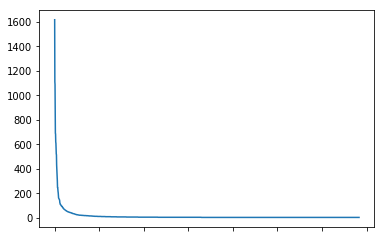

In [82]:
inc_grp = gtd[gtd.gname != 'Unknown'].gname.value_counts()
print(inc_grp.head())
inc_grp.plot(kind='line')

In [67]:
inc_grp_csum = gtd[gtd.gname != 'Unknown'].gname.value_counts(normalize=True).cumsum()
inc_grp_csum

Taliban                                                                      0.070352
Islamic State of Iraq and the Levant (ISIL)                                  0.118618
Shining Path (SL)                                                            0.165970
Farabundo Marti National Liberation Front (FMLN)                             0.201342
Al-Shabaab                                                                   0.231312
Irish Republican Army (IRA)                                                  0.261065
Revolutionary Armed Forces of Colombia (FARC)                                0.287942
New People's Army (NPA)                                                      0.314384
Kurdistan Workers' Party (PKK)                                               0.338909
Boko Haram                                                                   0.361518
Basque Fatherland and Freedom (ETA)                                          0.383821
Communist Party of India - Maoist (CPI-Maoist)        

In [20]:
len(inc_grp_csum[inc_grp_csum <= 0.95]) / len(gtd.gname.unique())

0.4046783625730994

### Second and third groups

In [21]:
additional_names = gtd.loc[:, ['gname2', 'gname3']].dropna(how='all').groupby(by=gtd.loc[:,'gname']).count()

In [22]:
additional_names.sort_values(by='gname2', ascending=False)

,gname2,gname3
gname,,
Al-Nusrah Front,20,4
Taliban,19,1
Tehrik-i-Taliban Pakistan (TTP),16,2
Revolutionary Armed Forces of Colombia (FARC),13,0
Islamic State of Iraq and the Levant (ISIL),12,0
Asa'ib Ahl al-Haqq,10,0
National Liberation Army of Colombia (ELN),9,0
Tupac Amaru Revolutionary Movement (MRTA),9,0
Lashkar-e-Taiba (LeT),9,1


### Subnames

In [23]:
sub_names = gtd.loc[:,'gsubname'].dropna().groupby(by=gtd.loc[:,'gname']).count()

In [24]:
sub_names.sort_values(ascending=False)

gname
Farabundo Marti National Liberation Front (FMLN)            123
Revolutionary Armed Forces of Colombia (FARC)               107
Sikh Extremists                                             101
Islamic State of Iraq and the Levant (ISIL)                  56
New People's Army (NPA)                                      53
Tehrik-i-Taliban Pakistan (TTP)                              36
Tamils                                                       35
Kurdistan Workers' Party (PKK)                               34
Chechen Rebels                                               32
Opposition Group                                             31
Hezbollah                                                    30
United Popular Action Movement                               27
Communist Party of India - Maoist (CPI-Maoist)               25
Islamist extremists                                          23
National Democratic Front of Bodoland (NDFB)                 22
Hutu extremists                   

### Unaffiliated individuals

The ratio of unaffiliated individuals is 0.2%

In [25]:
gtd.individual.value_counts().iloc[1] / len(gtd)

0.0026063679909833757

There are 314 cases where the perpetrator is an unaffiliated individual but somehow also connected to a vague, broadly defined group:

In [26]:
gtd.gname[(gtd.individual == 1) & (gtd.gname != "Unknown")].value_counts()

Jihadi-inspired extremists      13
White extremists                 9
Anti-Muslim extremists           8
Anti-Government extremists       8
Muslim extremists                7
Anti-Abortion extremists         7
Anti-Semitic extremists          5
Iraqi extremists                 3
Anti-Police extremists           3
Anti-Nuclear extremists          3
Right-wing extremists            3
Marxists                         2
Animal Rights extremists         2
Moroccan extremists              1
Anti-Sikh extremists             1
Anti-Israeli extremists          1
Court Reform extremists          1
Armenian extremists              1
Supporters of Saddam Hussein     1
Anti-Immigrant extremists        1
Anti-Yanukovych extremists       1
Turkish radicals                 1
Neo-Nazi extremists              1
Anti-Environmentalists           1
African-American extremists      1
Armenian nationalists            1
Gaddafi loyalists                1
Name: gname, dtype: int64

## Missing values

From among the total 135 attributes 104 contains missing values. From among these, 75% miss more than 40% of their values.

In [27]:
def missing_ratio(data):
    """
    Lists missing values ratios for each column in a dataset.
    
    Takes `data`, dataset.
    
    Returns the `mrat` dataframe, which lists the columns and their corresponding missing value ratios in descending order.
    """
    mrat = data.isnull().mean()[data.isnull().any() == True]
    mrat = mrat.sort_values(ascending=False)
    return mrat

In [28]:
misrat_gtd = missing_ratio(gtd)
misrat_gtd

gsubname3           0.999953
weapsubtype4_txt    0.999577
weapsubtype4        0.999577
weaptype4           0.999530
weaptype4_txt       0.999530
claimmode3_txt      0.999413
claimmode3          0.999413
gsubname2           0.999108
claim3              0.998568
guncertain3         0.998544
gname3              0.998544
divert              0.998122
attacktype3_txt     0.997910
attacktype3         0.997910
ransompaidus        0.997065
ransomamtus         0.996994
ransomnote          0.996830
claimmode2_txt      0.996713
claimmode2          0.996713
ransompaid          0.995820
corp3               0.994764
targsubtype3        0.994435
targsubtype3_txt    0.994435
natlty3             0.994130
natlty3_txt         0.994130
targtype3_txt       0.993989
target3             0.993989
targtype3           0.993989
ransomamt           0.991805
weapsubtype3        0.990866
                      ...   
propextent          0.647178
scite2              0.593360
ransom              0.549380
nperps        

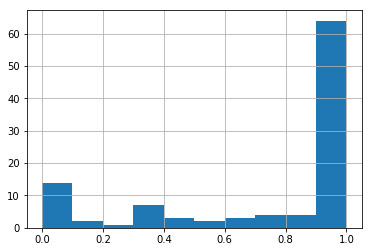

In [29]:
misrat_gtd.hist()

From among the target variables, only the primary perpetrator's general name (`gname`) is available for every example. For the rest, the missing value ratio is above 95%.

In [30]:
gtd.isnull().mean().sort_index(ascending=True).loc['gname':'gsubname3']

gname        0.000000
gname2       0.989434
gname3       0.998544
gsubname     0.969851
gsubname2    0.999108
gsubname3    0.999953
dtype: float64

In [31]:
idx_gtd = gtd.dtypes[(gtd.dtypes == 'float64') |
              (gtd.dtypes == 'int64')].index                                   

nums = gtd.reindex(idx_gtd, axis=1)

nums.drop(['eventid'], axis=1, inplace=True)

nums.dropna(axis=1, inplace=True, thresh=nums.shape[0] * 0.95)
nums.dropna(inplace=True)

print(nums.info())
nums.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40963 entries, 145918 to 94344
Data columns (total 29 columns):
iyear          40963 non-null int64
imonth         40963 non-null int64
iday           40963 non-null int64
extended       40963 non-null int64
country        40963 non-null int64
region         40963 non-null int64
latitude       40963 non-null float64
longitude      40963 non-null float64
specificity    40963 non-null float64
vicinity       40963 non-null int64
crit1          40963 non-null int64
crit2          40963 non-null int64
crit3          40963 non-null int64
doubtterr      40963 non-null int64
multiple       40963 non-null int64
success        40963 non-null int64
suicide        40963 non-null int64
attacktype1    40963 non-null int64
targtype1      40963 non-null int64
natlty1        40963 non-null float64
guncertain1    40963 non-null float64
individual     40963 non-null int64
weaptype1      40963 non-null int64
property       40963 non-null int64
ishostkid   

,iyear,imonth,iday,extended,country,region,latitude,longitude,specificity,vicinity,...,natlty1,guncertain1,individual,weaptype1,property,ishostkid,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
count,40963.000000,40963.000000,40963.000000,40963.000000,40963.000000,40963.000000,40963.000000,40963.000000,40963.000000,40963.000000,...,40963.000000,40963.000000,40963.000000,40963.000000,40963.000000,40963.000000,40963.000000,40963.000000,40963.000000,40963.000000
mean,2001.930181,6.479506,15.459024,0.044772,133.977882,7.154359,23.304261,26.491808,1.351439,0.068159,...,128.307595,0.084906,0.002685,6.423065,-0.521593,0.059590,-4.636697,-4.556502,0.115446,-4.036350
std,13.122697,3.387652,8.808059,0.206806,114.105485,2.928151,18.909227,58.325683,0.824570,0.296114,...,87.963605,0.278745,0.051751,2.145928,3.110593,0.453263,4.541567,4.630690,0.319563,4.697361
min,1970.000000,0.000000,0.000000,0.000000,4.000000,1.000000,-45.571112,-176.176447,1.000000,-9.000000,...,4.000000,0.000000,0.000000,1.000000,-9.000000,-9.000000,-9.000000,-9.000000,0.000000,-9.000000
25%,1990.000000,4.000000,8.000000,0.000000,78.000000,5.000000,10.990000,2.837594,1.000000,0.000000,...,83.000000,0.000000,0.000000,5.000000,0.000000,0.000000,-9.000000,-9.000000,0.000000,-9.000000
50%,2008.000000,6.000000,15.000000,0.000000,102.000000,7.000000,31.363648,43.130000,1.000000,0.000000,...,104.000000,0.000000,0.000000,6.000000,1.000000,0.000000,-9.000000,-9.000000,0.000000,0.000000
75%,2014.000000,9.000000,23.000000,0.000000,160.000000,10.000000,34.716259,68.437196,1.000000,0.000000,...,182.000000,0.000000,0.000000,6.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,2016.000000,12.000000,31.000000,1.000000,1004.000000,12.000000,74.633553,178.441900,4.000000,1.000000,...,1004.000000,1.000000,1.000000,13.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Correlated attributes

In [32]:
def cors(data, threshold=0.5, sort=False):
    """Lists correlation pairs and their correlation values above a correlation threshold.
    
    `data`: DataFrame
    
    `threshold`: The correlation value above which it shows the correlation pairs.
    
    `paired`: True
    Organizes the correlation pairs according to attributes.
    If False, it shows the correlation pairs values in the descending order.
    """
    
    corrs = data.corr()
    
    cri_hi = abs(corrs < 1) & abs(corrs >= threshold)
    corr_hi = corrs[cri_hi].stack().reset_index()
    corr_hi.columns = ['first', 'second', 'corr']
    
    if sort == True:
        output = corr_hi.sort_values(by='corr', ascending=False)
    else: 
        output = corrs[cri_hi].stack()
    
    return output

In [33]:
cors(gtd, 0.7, sort=False)

eventid       iyear           0.999995
iyear         eventid         0.999995
crit3         alternative     0.724507
alternative   crit3           0.724507
attacktype2   guncertain3     0.979864
targtype1     targsubtype1    0.987687
targsubtype1  targtype1       0.987687
targsubtype2  guncertain3     0.803903
targtype3     targsubtype3    0.977063
              claimmode2      0.928571
targsubtype3  targtype3       0.977063
              claimmode2      0.854440
guncertain1   guncertain3     0.785747
guncertain2   guncertain3     0.831522
guncertain3   attacktype2     0.979864
              targsubtype2    0.803903
              guncertain1     0.785747
              guncertain2     0.831522
              weapsubtype3    0.980154
claim2        claim3          0.767610
claimmode2    targtype3       0.928571
              targsubtype3    0.854440
claim3        claim2          0.767610
weaptype1     weapsubtype1    0.754327
weapsubtype1  weaptype1       0.754327
weaptype2     weapsubtype

## Outliers

iyear             AxesSubplot(0.125,0.772143;0.133621x0.107857)
imonth         AxesSubplot(0.285345,0.772143;0.133621x0.107857)
iday            AxesSubplot(0.44569,0.772143;0.133621x0.107857)
extended       AxesSubplot(0.606034,0.772143;0.133621x0.107857)
country        AxesSubplot(0.766379,0.772143;0.133621x0.107857)
region            AxesSubplot(0.125,0.642714;0.133621x0.107857)
latitude       AxesSubplot(0.285345,0.642714;0.133621x0.107857)
longitude       AxesSubplot(0.44569,0.642714;0.133621x0.107857)
specificity    AxesSubplot(0.606034,0.642714;0.133621x0.107857)
vicinity       AxesSubplot(0.766379,0.642714;0.133621x0.107857)
crit1             AxesSubplot(0.125,0.513286;0.133621x0.107857)
crit2          AxesSubplot(0.285345,0.513286;0.133621x0.107857)
crit3           AxesSubplot(0.44569,0.513286;0.133621x0.107857)
doubtterr      AxesSubplot(0.606034,0.513286;0.133621x0.107857)
multiple       AxesSubplot(0.766379,0.513286;0.133621x0.107857)
success           AxesSubplot(0.125,0.38

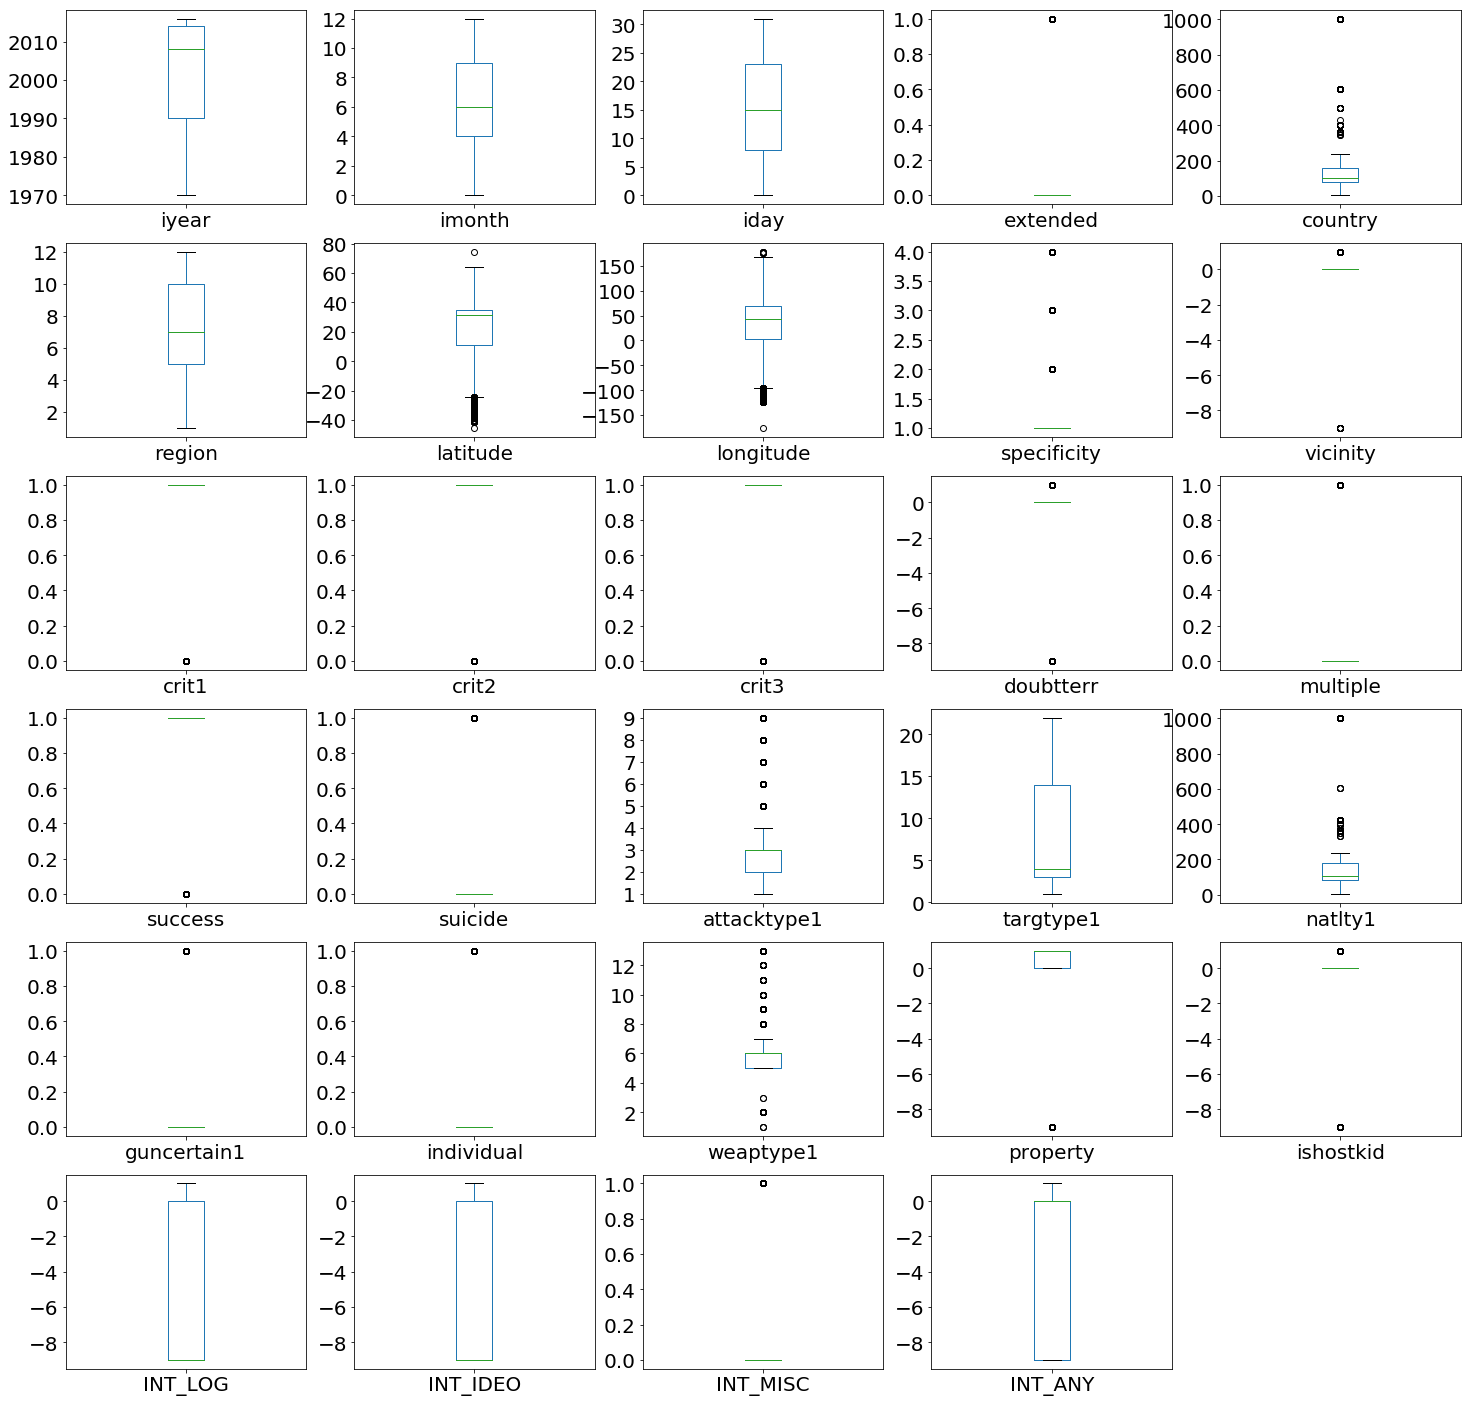

In [34]:
nums.plot(kind='box', subplots=True, layout=(6,5), figsize=(25, 25), fontsize=20)

from sklearn.neighbors import LocalOutlierFactor

lof = LocalOutlierFactor(n_neighbors=10)

lof_pre = lof.fit_predict(nums)
lof_pre

In [35]:
#ele = EllipticEnvelope()
#onecsvm = OneClassSVM()

# Data preprocessing

In the first round, we preprocess the data to create a viable minimum set, on which we start model testing. This consists of the following steps:
1. Dropping special attributes
* Excluding incidents with 'unknown' perpetrators
* Excluding 'unaffiliated' individuals
* Excluding the ambiguous cases
* Including only general names and only of the primary perpetrators (i.e. `gname`)
* Dropping all missing values
* Including only numerical values
* Excluding data before 2012
* Including only the top perpetrators responsible for 95% of total incidents

## Dropping special attributes

The special attributes of the dataset:
* eventid
* addnotes
* scite1
* scite2
* scite3
* dbsource



## Attribute specific changes

In [36]:
gtd.imonth.value_counts()

5     3843
7     3826
10    3727
6     3689
8     3665
3     3606
1     3522
4     3493
11    3476
9     3371
2     3234
12    3130
0        6
Name: imonth, dtype: int64

In [37]:
gtd.imonth[gtd.imonth == 0] = np.random.randint(1, 13)

/home/andras/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


### Replacing 'in-built' missing values with numpy NaN

In [38]:
missing_signs = [0, -9, -99]

In [39]:
mis_zero = ['imonth', 'iday']
mis_min9 = ['doubterr', 'vicinity', 'property', 'ishostkid', 'ransom', 'property', 'ishostkid']
mis_min99 = ['nperps', 'nperpcap', 'complaim', 'nhostkid', 'nhostkidus', 'nhours', 'ndays', 'ransomamt', 'ransomus', 'ransomamtus', 'ransompaid', 'ransompaidus', 'nreleased', 'ishostkidus', 'nhostkid', 'nhostkidus', 'nhours', 'ndays', 'ransomamt', 'ransomus', 'ransomamtus', 'ransompaid', 'ransompaidus', 'nreleased']

In [40]:
miscodes = {"0": mis_zero, 
            "-9": mis_min9, 
            "-99": mis_min99}

In [41]:
def replacenan(collist, nanvalue):
    """Replaces columns' missing value code with numpy NaN.
    
    Parameters:
    `collist` : list of column names
    
    `nanvalue` : the code of the missing value in the particular column
    """

    for col in collist:
        if col in gtd.columns:
            gtd.replace(to_replace=nanvalue, value=np.NaN, inplace=True)

            print("\n{}:\n\n{}\n".format(col, valcounts))

        else:
            print("'{}' is not among the dataframe's columns.".format(col))

In [42]:
gtd.isnull()[gtd.isnull() == True].count().mean()

24180.162962962964

In [43]:
#for code in miscodes:
#    replacenan(miscodes[code], code)

In [61]:
gtd.columns.values

array(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region', 'region_txt',
       'provstate', 'city', 'latitude', 'longitude', 'specificity',
       'vicinity', 'location', 'summary', 'crit1', 'crit2', 'crit3',
       'doubtterr', 'alternative', 'alternative_txt', 'multiple',
       'success', 'suicide', 'attacktype1', 'attacktype1_txt',
       'attacktype2', 'attacktype2_txt', 'attacktype3', 'attacktype3_txt',
       'targtype1', 'targtype1_txt', 'targsubtype1', 'targsubtype1_txt',
       'corp1', 'target1', 'natlty1', 'natlty1_txt', 'targtype2',
       'targtype2_txt', 'targsubtype2', 'targsubtype2_txt', 'corp2',
       'target2', 'natlty2', 'natlty2_txt', 'targtype3', 'targtype3_txt',
       'targsubtype3', 'targsubtype3_txt', 'corp3', 'target3', 'natlty3',
       'natlty3_txt', 'gname', 'gsubname', 'gname2', 'gsubname2',
       'gname3', 'gsubname3', 'motive', 'guncertain1', 'guncertain2',
       'guncertain3', 'in

In [58]:
for col in range(len(['doubterr', 'vicinity', 'property', 'ishostkid', 'ransom', 'property', 'ishostkid'])):
    
    valcounts = gtd[['doubterr', 'vicinity', 'property', 'ishostkid', 'ransom', 'property', 'ishostkid']].iloc[:,col].value_counts().head(10)
    
    print("\n{}:\n\n{}\n".format(gtd.columns[col], valcounts))

KeyError: "['doubterr'] not in index"

Marking missing values

In [45]:
gtd.imonth.where(gtd.imonth != 0, None, inplace=True)

In [46]:
gtd.iday.where(gtd.iday != 0, None, inplace=True)

In [47]:
gtd.replace(to_replace='Unknown', value=np.NaN, inplace=True)

## Preprocessing

In [48]:
moddat = gtd.copy(deep=True)
moddat = preproc(moddat, 
               primonly=True, 
               period=(1, 5), 
               onlyknown=True, 
               nocat=True, 
               maxna=0.05, 
               topincrat=0.95, 
               hideind=False, 
               hideuncert=False, 
               dropspec=True,
               dropres=True)

NameError: name 'preproc' is not defined

### Correlated attributes

In [ ]:
corpair = cors(moddat, 0.7, sort=True)
corpair

In [ ]:
moddat.drop(columns=['INT_LOG', 'INT_IDEO', 'targsubtype1'], inplace=True)

# Modeling

In [ ]:
X = moddat.drop(['gname'], axis=1).dropna(axis=1)
X.dropna(axis=1, inplace=True)
print(X.shape)

In [ ]:
y = moddat.gname
y.dropna(inplace=True)
y.fillna("NaN", inplace=True)
y.shape

In [ ]:
validation_size = 0.2
seed = 17

In [ ]:
X_train, X_validation, y_train, y_validation = train_test_split(X, y, test_size=validation_size, random_state=seed)
print(X_train.shape)
print(X_validation.shape)
print(y_train.shape)
print(y_validation.shape)

In [ ]:
results = []
names = []

In [ ]:
kfold = KFold(n_splits=10, random_state=seed)

## Trying models

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import hinge_loss
from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import fbeta_score
from sklearn.metrics import hamming_loss
from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import log_loss
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import precision_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import recall_score
from sklearn.metrics import zero_one_loss

## Decisions tree

In [ ]:
models = {"Decisiong Tree Classifier": DecisionTreeClassifier(),
          "K-Neighbors Classifier": KNeighborsClassifier(), 
          "Linear Discriminant Analysis": LinearDiscriminantAnalysis()}

# "Logistic Regression": LogisticRegression()

In [ ]:
def predict_groups(models, X_train, y_train):
    for model in models:
        print("\n{}:\n\n{}\n".format(model, models[model]))
          
        model_score = cross_val_score(models[model], X_train, y_train, cv=kfold, scoring='accuracy', verbose=True)
        print("{}\nAccuracy: {} ({}\n)".format(model, model_score.mean(), model_score.std()))
        
        model_score = cross_val_score(models[model], X_train, y_train, cv=kfold, scoring='f1_micro', verbose=True)
        print("F1 micro: {} ({}\n)".format(model_score.mean(), model_score.std()))
        
        #crosval = cross_validate(model, X, y, scoring=['accuracy', 'precision_micro', 'recall_micro', 'f1_micro'])
    

In [ ]:
predict_groups(models, X_train, y_train)

## Logistic regression